# Task 2:

In [125]:
import numpy as np

# Divide 1 by 2 repeatedly until it is equivalent to 0 according to 32 bit floating point values
numprec_single = 1.0
while 1<np.float32(1+numprec_single): #single
    numprec_single*=0.5
numprec_single*=2
print(f'Machine epsilon (Single, 4 bytes):{numprec_single}')

# Divide 1 by 2 repeatedly until it is equivalent to 0 according to a double floating point value
numprec_double = 1.0
#while 1<np.float32(1+numprec): #single
while 1<1+numprec_double: #double
    numprec_double*=0.5
numprec_double*=2
print(f'Machine epsilon (Double, 8 bytes):{numprec_double}')

Machine epsilon (Single, 4 bytes):1.1920928955078125e-07
Machine epsilon (Double, 8 bytes):2.220446049250313e-16


# Task 3

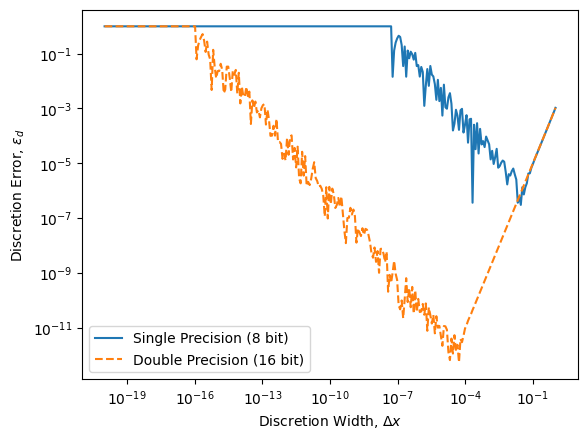

In [126]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Givens
# ======

# Set exponent values so delta_x is evenly spaced in log axis
exponents = np.linspace(-20, 0, 300) 
# Set the precision on the delta_x array which carries precision throughout equations
delta_x_single = np.array([10**n for n in exponents], dtype="float32") # Δx
delta_x_double = np.array([10**n for n in exponents], dtype="float64")

# Define the function f(x)
def f(x):
    return 1/(2+x) + x**2

# Numeric centered difference scheme for derivative of f(x)
def dfdx_n(x, delta_x):
    return ( f(x+delta_x) - f(x-delta_x) ) / (2 * delta_x)

# Analytic Derivatives
# ====================

# Analytic 1st derivative for f(x)
def dfdx(x):
    return -1/(2+x)**2 + 2*x

# Analytic 2nd derivate for f(x)
def d2fdx2(x):
    return 2/(2+x)**3 + 2

# Analytic 3rd derivate for f(x)
def d3fdx3(x):
    return -6/(2+x)**4

# Calculating Relative Discretion Error
# =====================================

# Given equation for relative discretion error
# (Note: the sign is flipped inside absolute value, which has no effect on ε_d)
# (Note: the precision is determined by the dtype of delta_x)
e_d_single = np.abs(( dfdx(2.0) - dfdx_n(2.0, delta_x_single) ) / dfdx(2.0) ) # ε_d
e_d_double = np.abs(( dfdx(2.0) - dfdx_n(2.0, delta_x_double) ) / dfdx(2.0) )

# Plot ε_d vs. Δx on a loglog scale
# ====================
plt.figure()
plt.loglog(delta_x_single, e_d_single, linestyle="-")
plt.loglog(delta_x_double, e_d_double, linestyle="--")
#plt.title("Relative Discretion Error with Varying Width of Approximation")
plt.xlabel(r'Discretion Width, $\Delta x$')
plt.ylabel(r'Discretion Error, $\varepsilon _d$')
plt.legend(["Single Precision (8 bit)", "Double Precision (16 bit)"])
plt.show()

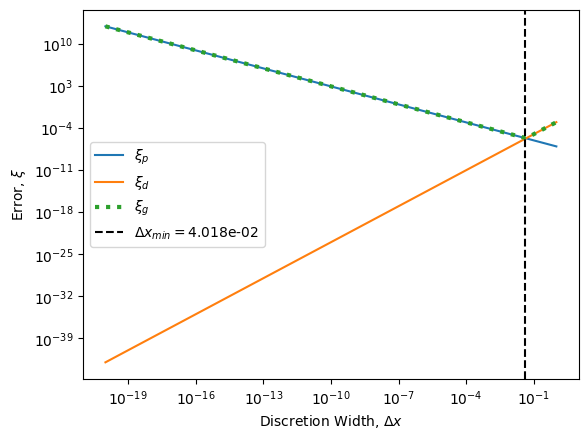

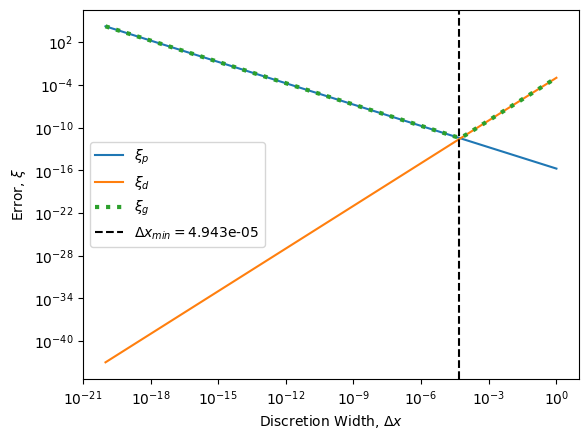

In [127]:
# Givens
# ======

# Analytic equations derived in handwritten notes

def xi_p(x, delta_x, numprec):
    return (f(2) * numprec) / (dfdx(2) * np.sqrt(2) * delta_x) 

def xi_d(x, delta_x):
    return (delta_x * delta_x * np.abs(d3fdx3(2))) / (6 * np.abs(dfdx(2)))

# Calculate errors for single and double precision
# ================================================

xi_p_single = xi_p(2.0, delta_x_single, numprec_single) # ξ_p
xi_p_double = xi_p(2.0, delta_x_double, numprec_double)
xi_d_single = xi_d(2.0, delta_x_single) # ξ_d
xi_d_double = xi_d(2.0, delta_x_double)

xi_g_single = np.sqrt(xi_p_single*xi_p_single + xi_d_single*xi_d_single) # ξ_g
xi_g_double = np.sqrt(xi_p_double*xi_p_double + xi_d_double*xi_d_double)

# Calculate the Δx for minimum error
# ==================================

# The minimum should occur at delta_x_min
delta_x_min_single = np.cbrt(np.abs(np.divide(6 * f(2) * numprec_single, 2 * d3fdx3(2)))) # Δx_min
delta_x_min_double = np.cbrt(np.abs(np.divide(6 * f(2) * numprec_double, 2 * d3fdx3(2))))

# Plot ξ_p, ξ_d, ξ_g vs. Δx on a loglog scale
# ===================================================

# Single Precision
plt.figure()
plt.loglog(delta_x_single, xi_p_single, linestyle='-')
plt.loglog(delta_x_single, xi_d_single, linestyle='-')
plt.loglog(delta_x_single, xi_g_single, linestyle='dotted', linewidth=3)
plt.axvline(delta_x_min_single, linestyle='--', color='k')

plt.legend([r'$\xi _p$', r'$\xi _d$', r'$\xi _g$', r'$\Delta x_{min} = $'+f'{np.format_float_scientific(delta_x_min_single, 3)}'])
#plt.title("Relative error between numerical and analytic derivatives of f(x) with single precision")
plt.xlabel(r'Discretion Width, $\Delta x$')
plt.ylabel(r'Error, $\xi$')
plt.show()

# Double Precision
plt.figure()
plt.loglog(delta_x_double, xi_p_double, linestyle='-')
plt.loglog(delta_x_double, xi_d_double, linestyle='-')
plt.loglog(delta_x_double, xi_g_double, linestyle='dotted', linewidth=3)
plt.axvline(delta_x_min_double, linestyle='--', color='k')

plt.legend([r'$\xi _p$', r'$\xi _d$', r'$\xi _g$', r'$\Delta x_{min} = $'+f'{np.format_float_scientific(delta_x_min_double, 3)}'])
#plt.title("Relative error between numerical and analytic derivatives of f(x) with single precision")
plt.xlabel(r'Discretion Width, $\Delta x$')
plt.ylabel(r'Error, $\xi$')
plt.show()